# VisDrone2020 Dataset

In [1]:
import collections
from csv import DictReader
from pathlib import Path
from pprint import pprint
from typing import Generator


import datasets
import pandas as pd

In [2]:
!ls -l

total 16720
-rw-r--r--  1 etienne.deprit  staff  8553897 Dec 21 16:26 Load VisDrone.ipynb
drwx------@ 5 etienne.deprit  staff      160 Dec 15 13:53 VisDrone2019-DET-test-dev
drwxrwxr-x@ 5 etienne.deprit  staff      160 Dec 20 19:45 VisDrone2019-DET-train
drwxr-xr-x@ 5 etienne.deprit  staff      160 Apr 24  2018 VisDrone2019-DET-val
-rw-r--r--@ 1 etienne.deprit  staff     2425 Dec 17 21:28 visdrone2020.py
drwxr-xr-x  6 etienne.deprit  staff      192 Dec 21 16:18 visdrone_copy


In [3]:
visdrone_root = Path('./')
visdrone_train_path = visdrone_root / Path('VisDrone2019-DET-train')
visdrone_val_path = visdrone_root / Path('VisDrone2019-DET-val')
visdrone_test_path = visdrone_root / Path('VisDrone2019-DET-test-dev')

SPLITS = {
    datasets.Split.TRAIN: visdrone_train_path,
    datasets.Split.VALIDATION: visdrone_val_path,
    datasets.Split.TEST: visdrone_test_path
}

In [4]:
!ls -l $visdrone_train_path/annotations | head -n 5
!ls -l $visdrone_train_path/images | head -n 5

total 52912
-rw-rw-r--@ 1 etienne.deprit  staff   1982 Apr 15  2018 0000002_00005_d_0000014.txt
-rw-rw-r--@ 1 etienne.deprit  staff   2188 Apr 15  2018 0000002_00448_d_0000015.txt
-rw-rw-r--@ 1 etienne.deprit  staff   1283 Apr 15  2018 0000003_00231_d_0000016.txt
-rw-rw-r--@ 1 etienne.deprit  staff   1422 Apr 15  2018 0000007_04999_d_0000036.txt
ls: stdout: Undefined error: 0
total 3049112
-rw-rw-r--@ 1 etienne.deprit  staff   98691 Mar 10  2018 0000002_00005_d_0000014.jpg
-rw-rw-r--@ 1 etienne.deprit  staff  100183 Mar 10  2018 0000002_00448_d_0000015.jpg
-rw-rw-r--@ 1 etienne.deprit  staff  105757 Mar 10  2018 0000003_00231_d_0000016.jpg
-rw-rw-r--@ 1 etienne.deprit  staff  194306 Mar 10  2018 0000007_04999_d_0000036.jpg
ls: stdout: Undefined error: 0


In [5]:
annotations = list((visdrone_val_path / Path('annotations')).glob('*.txt'))
pprint(annotations[:10])

[PosixPath('VisDrone2019-DET-val/annotations/0000327_03601_d_0000729.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000295_00800_d_0000025.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000271_00601_d_0000377.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000289_02401_d_0000823.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000249_02900_d_0000009.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000316_01801_d_0000528.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000213_04998_d_0000245.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000359_00589_d_0000702.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000215_00447_d_0000257.txt'),
 PosixPath('VisDrone2019-DET-val/annotations/0000364_01765_d_0000782.txt')]


In [6]:
sample_annotations = str(annotations[0])

!head -n 30 $sample_annotations

503,73,24,11,1,4,0,0
504,87,31,16,1,5,0,1
524,94,23,12,1,4,0,1
492,100,29,15,1,4,0,1
459,131,31,19,1,5,0,1
493,131,39,23,1,6,0,1
560,45,19,18,1,9,0,0
586,83,12,13,1,4,0,0
606,86,15,13,1,4,0,0
639,89,30,25,0,0,0,0
735,124,25,13,1,5,0,1
724,120,22,12,1,4,0,1
596,114,16,15,1,4,0,0
607,126,19,13,1,4,0,1
618,133,17,17,1,4,0,0
635,129,18,14,1,4,0,0
647,143,19,18,1,4,0,1
650,153,17,18,1,4,0,1
648,165,19,18,1,4,0,1
677,163,20,15,1,4,0,1
654,182,21,21,1,4,0,0
676,174,20,19,1,4,0,0
697,182,19,20,1,4,0,0
670,199,21,22,1,4,0,0
669,231,25,22,1,4,0,0
571,222,26,24,1,4,0,0
541,192,27,21,1,4,0,1
545,178,31,19,1,4,0,1
591,143,13,17,1,8,0,0
474,252,56,33,1,5,0,1


### Categories
```
    categories[{
        "id": int,
        "name": str
    }]
```

In [7]:
CATEGORIES = [
    'ignored',
    'pedestrian',
    'people',
    'bicycle',
    'car',
    'van',
    'truck',
    'tricycle',
    'awning-tricycle',
    'bus',
    'motor',
    'other'
]

pprint(CATEGORIES)

['ignored',
 'pedestrian',
 'people',
 'bicycle',
 'car',
 'van',
 'truck',
 'tricycle',
 'awning-tricycle',
 'bus',
 'motor',
 'other']


### Annotations
```
    annotation{
        "id": int,
        "bbox": [x,y,width,height],
        "category_id": int,
        "category": str,
        "truncation": int,
        "occlusion": int
    }
```

In [8]:
ANNOTATION_FIELDS = [
    'x',
    'y',
    'width',
    'height',
    'score',
    'category_id',
    'truncation',
    'occlusion'
]

def load_annotations(path: Path) -> dict:
    with open(path, 'r') as f:
        reader = DictReader(f, fieldnames=ANNOTATION_FIELDS)
        annotations = []
        for id, row in enumerate(reader):
            category_id = int(row['category_id'])
            annotation = {
                'id': id,
                'bbox': list(map(float, [row[k] for k in ANNOTATION_FIELDS[:4]])),
                'category_id': category_id,
                'category': CATEGORIES[category_id],
                'truncation': row['truncation'],
                'occlusion': row['occlusion']
            }
            annotations.append(annotation)
        return annotations

In [9]:
load_annotations(annotations[0])

[{'id': 0,
  'bbox': [503.0, 73.0, 24.0, 11.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '0'},
 {'id': 1,
  'bbox': [504.0, 87.0, 31.0, 16.0],
  'category_id': 5,
  'category': 'van',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 2,
  'bbox': [524.0, 94.0, 23.0, 12.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 3,
  'bbox': [492.0, 100.0, 29.0, 15.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 4,
  'bbox': [459.0, 131.0, 31.0, 19.0],
  'category_id': 5,
  'category': 'van',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 5,
  'bbox': [493.0, 131.0, 39.0, 23.0],
  'category_id': 6,
  'category': 'truck',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 6,
  'bbox': [560.0, 45.0, 19.0, 18.0],
  'category_id': 9,
  'category': 'bus',
  'truncation': '0',
  'occlusion': '0'},
 {'id': 7,
  'bbox': [586.0, 83.0, 12.0, 13.0],
  'category_id': 4,
  'categor

In [10]:
def load_samples(root: Path) -> Generator[dict, None, None]:
    images = (root / Path('annotations')).glob('*.txt')
    images_root = root / Path('images')
    for id, image in enumerate(images):
        annotations = load_annotations(image)
        sample = {
            'image_id': id,
            'file_name': image.name,
            'image': str(images_root / image.with_suffix('.jpg').name),
            'objects': load_annotations(image)
        }
        yield sample

In [11]:
pprint(list(load_samples(visdrone_val_path))[0])

{'file_name': '0000327_03601_d_0000729.txt',
 'image': 'VisDrone2019-DET-val/images/0000327_03601_d_0000729.jpg',
 'image_id': 0,
 'objects': [{'bbox': [503.0, 73.0, 24.0, 11.0],
              'category': 'car',
              'category_id': 4,
              'id': 0,
              'occlusion': '0',
              'truncation': '0'},
             {'bbox': [504.0, 87.0, 31.0, 16.0],
              'category': 'van',
              'category_id': 5,
              'id': 1,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [524.0, 94.0, 23.0, 12.0],
              'category': 'car',
              'category_id': 4,
              'id': 2,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [492.0, 100.0, 29.0, 15.0],
              'category': 'car',
              'category_id': 4,
              'id': 3,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [459.0, 131.0, 31.0, 19.0],
       

In [12]:
FEATURES = datasets.Features(
    {
        'image_id': datasets.Value('int64'),
        'file_name': datasets.Value('string'),
        'image': datasets.Image(),
        'objects': datasets.Sequence(
            {
                'id': datasets.Value('int64'),
                'bbox': datasets.Sequence(datasets.Value('float32'), length=4),
                'category_id': datasets.Value('int32'),
                'category': datasets.ClassLabel(names=CATEGORIES),
                'truncation': datasets.Value('int32'),
                'occlusion': datasets.Value('int32'),
            }
        ),
    }
)

In [13]:
def load_split(generator: Generator, split:Path, features=FEATURES) -> datasets.Dataset:
    return datasets.Dataset.from_generator(
        generator=generator,
        features=features,
        gen_kwargs={'root': str(split)}
    )

def load_dataset(splits: dict) -> datasets.DatasetDict:
    ds = datasets.DatasetDict({str(split): load_split(load_samples, root) for split, root in splits.items()})
    return ds

In [14]:
visdrone_ds = load_dataset(SPLITS)

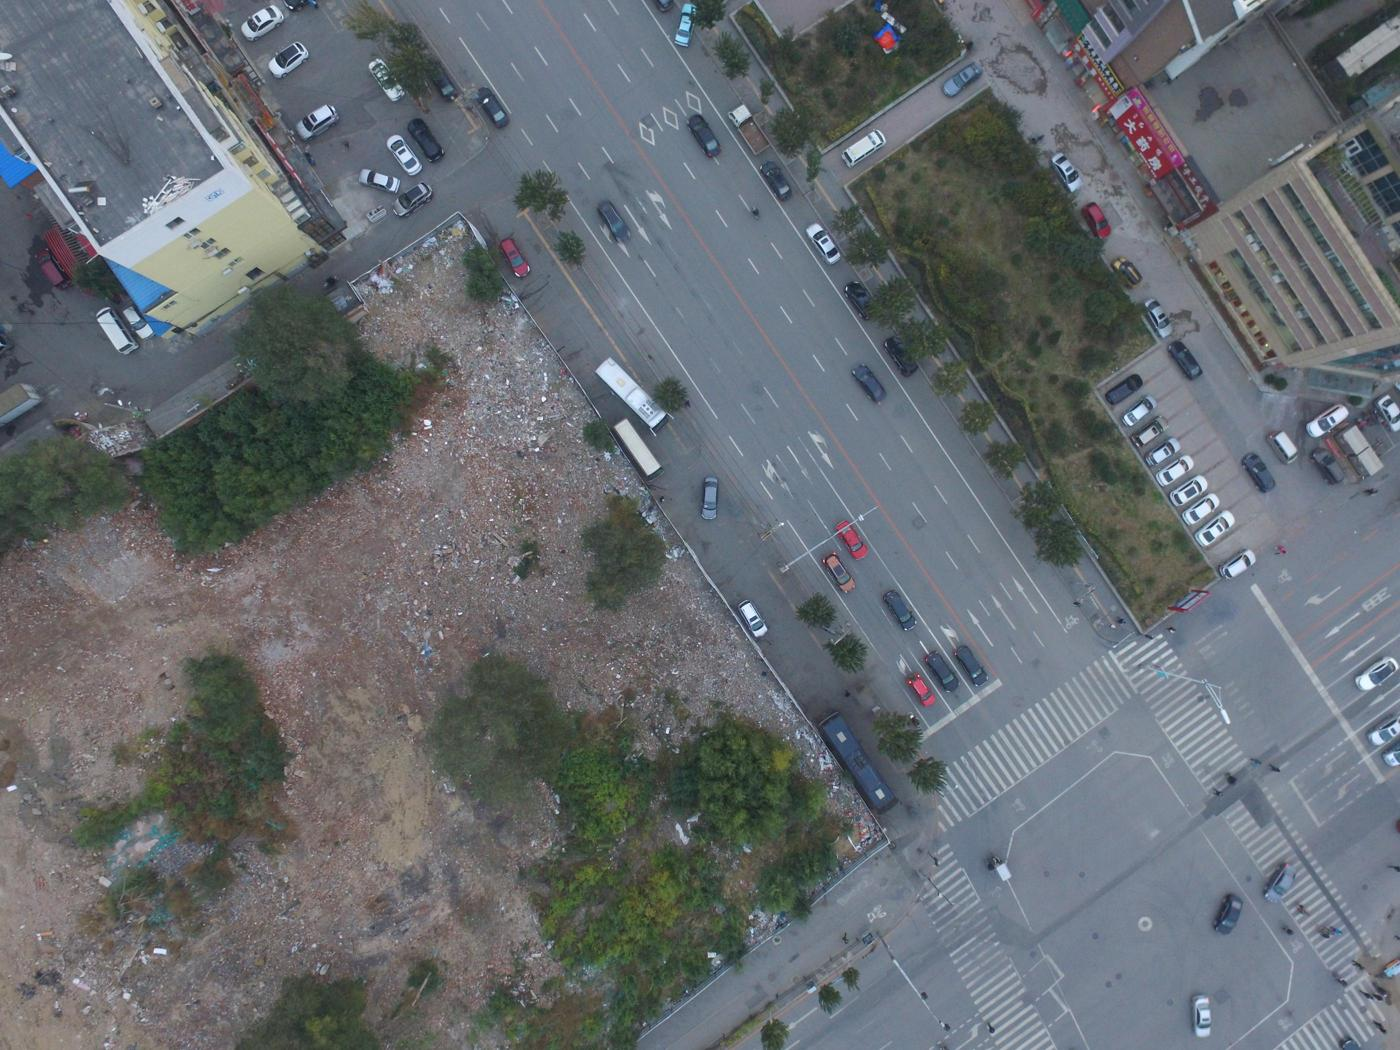

In [15]:
visdrone_ds[datasets.Split.TRAIN][0]['image']

In [16]:
!rm -rf visdrone_copy

visdrone_ds.save_to_disk('visdrone_copy')

Saving the dataset (0/4 shards):   0%|          | 0/6471 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/548 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1610 [00:00<?, ? examples/s]

In [17]:
ds = datasets.load_from_disk('visdrone_copy')

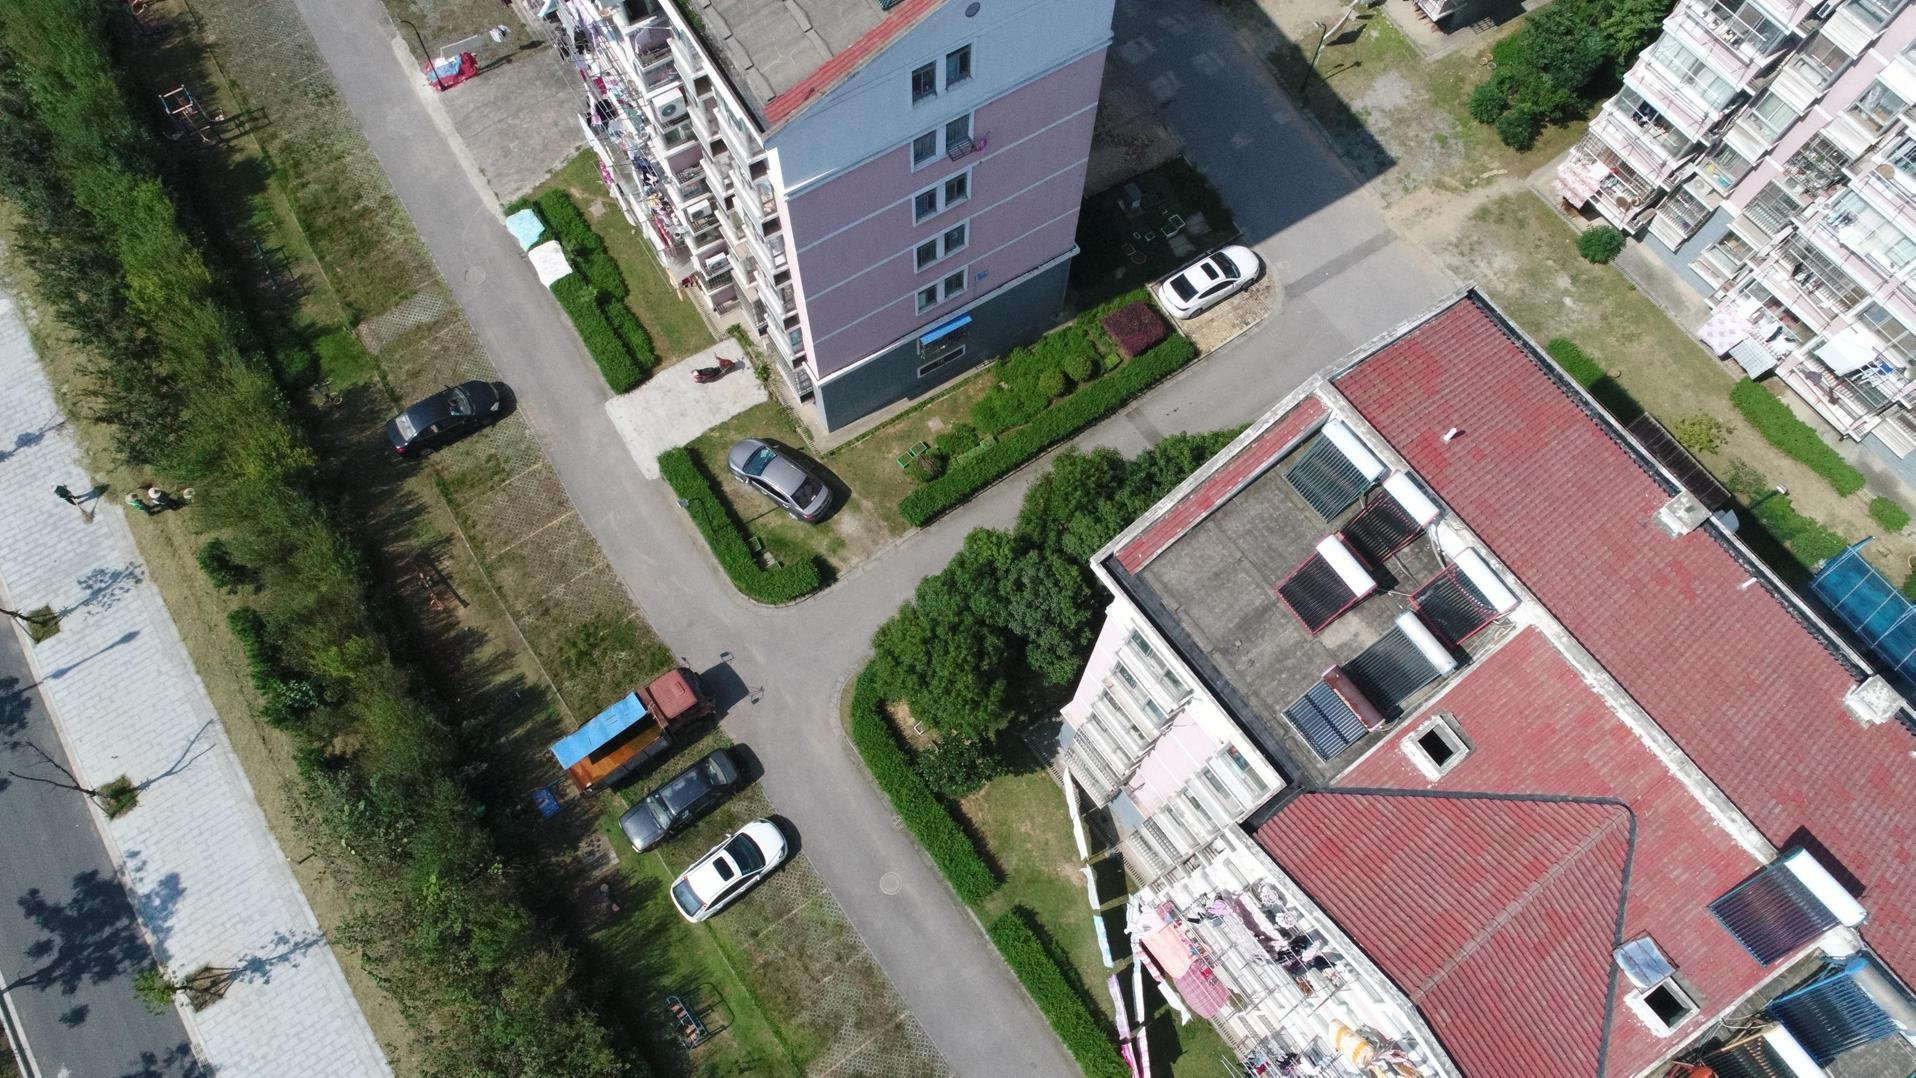

In [18]:
ds[datasets.Split.TEST][1]['image']

In [19]:
s3_path = 
ds.save_to_disk('s3://armory-library-data/visdrone2020/', max_shard_size="1GB")

Saving the dataset (0/2 shards):   0%|          | 0/6471 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/548 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1610 [00:00<?, ? examples/s]

In [21]:
!aws s3 ls s3://armory-library-data/visdrone2020/

                           PRE test/
                           PRE train/
                           PRE validation/
2023-12-21 16:27:26         43 dataset_dict.json
